**importing libraries**

In [7]:
import pandas as pd
import  matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns
from scipy.constants import degree


**importing the dataset and exploring it**

In [5]:
data_set=pd.read_csv("heart.csv")
data_set.head()
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


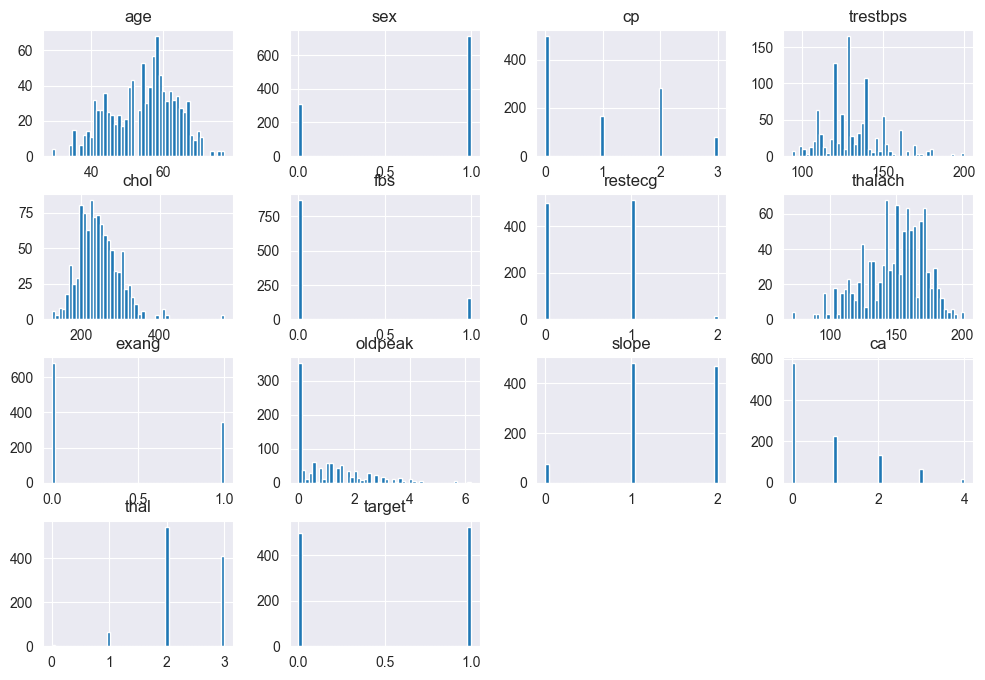

In [8]:
data_set.hist(bins=50,figsize=(12,8))
plt.show()

In [11]:
data_set.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='Count'>

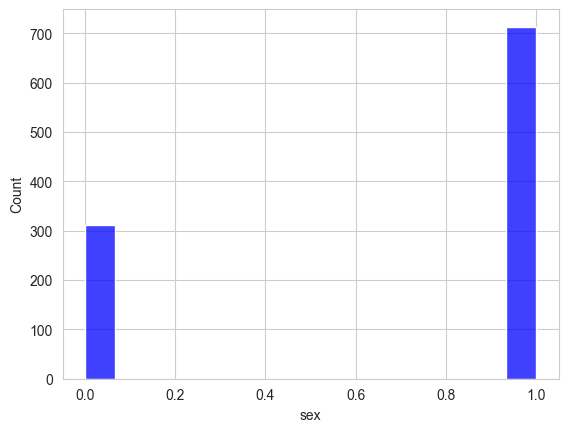

In [13]:
sns.set_style("whitegrid")
sns.histplot(data_set["sex"],bins=15,color='blue')

In [14]:
data_set.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='Count'>

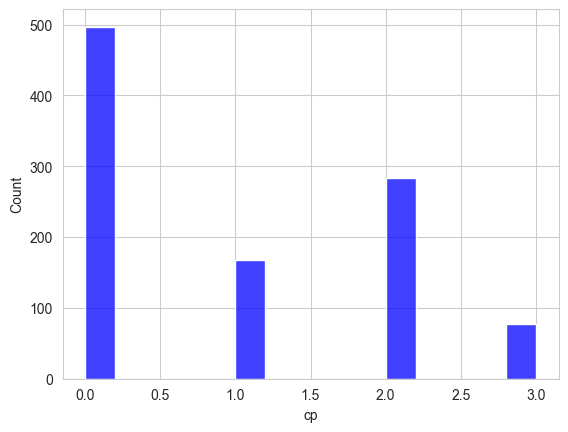

In [15]:
sns.set_style("whitegrid")
sns.histplot(data_set["cp"],bins=15,color='blue')

**looking for coorelations**

In [29]:
corr_matrix=data_set.corr()
corr_matrix["target"].sort_values()

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

**preparing the data for algorithms**


In [35]:
from sklearn.model_selection import train_test_split
y=data_set["target"]
x=data_set.drop("target",axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True, test_size=0.2)
data=x_train
data.isnull().sum()


(820, 13)

**Scaling the data**


In [42]:
from sklearn.preprocessing import StandardScaler
std_Scaler=StandardScaler()
data_scaled=std_Scaler.fit_transform(data)
X_test_scaled = std_Scaler.transform(x_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}

lg=LogisticRegression(solver='liblinear',max_iter=500)
grid_search = GridSearchCV(lg, param_grid,cv=5,scoring='accuracy')
grid_search.fit(data_scaled,y_train)
#grid_search.best_params_
logistic_regression_model=grid_search.best_estimator_




***Evaluating the model**

In [52]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
logistic_regression_model.score(data_scaled,y_train)
y_pred=logistic_regression_model.predict(X_test_scaled)
logistic_acc=accuracy_score(y_test,y_pred)
logistic_recall=recall_score(y_test,y_pred)
logistic_precision=precision_score(y_test,y_pred)
logistic_f1=f1_score(y_test,y_pred)
print(logistic_acc)
print(logistic_recall)
print(logistic_precision)
print(logistic_f1)

0.8536585365853658
0.8725490196078431
0.839622641509434
0.8557692307692307


**SVM Classifier**

**Since our dataset is not linearly seperable, we will use kernel non_linear svm**

In [54]:
from sklearn.svm import SVC
poly_kernel_clf=SVC(kernel='poly',degree=3,C=5,coef0=1)
param_grid={
    "degree":[1,2,3,4,5],
    'C' : [0.01, 0.1, 1, 10, 100, 1000,5],
    'coef0':[0.01,0.1,1,10,100,100]

}
svc_grid_search=GridSearchCV(poly_kernel_clf,param_grid,cv=5,scoring='accuracy')
svc_grid_search.fit(data_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(C=5, coef0=1, kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 5],
                         'coef0': [0.01, 0.1, 1, 10, 100, 100],
                         'degree': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [55]:
svc_model=svc_grid_search.best_estimator_
y_pred=svc_model.predict(X_test_scaled)
svc_acc=accuracy_score(y_test,y_pred)
svc_recall=recall_score(y_test,y_pred)
svc_precision=precision_score(y_test,y_pred)
svc_f1=f1_score(y_test,y_pred)
print(svc_acc)
print(svc_recall)
print(svc_precision)
print(svc_f1)

0.9902439024390244
1.0
0.9807692307692307
0.9902912621359223


**Check for overfitting**

In [58]:
from sklearn.model_selection import cross_val_score


cross_val_scores = cross_val_score(svc_model, data_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Average Cross-Validation Accuracy: {cross_val_scores.mean()}")



Cross-Validation Scores: [0.99390244 0.99390244 0.98170732 0.97560976 0.9695122 ]
Average Cross-Validation Accuracy: 0.9829268292682928


**Training Random forest classifier**

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Valid values for max_features
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
   
}


rf = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42, verbose=2)
random_search.fit(data_scaled, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Best Score: 0.9853658536585366


In [82]:
Random_forest_model=random_search.best_estimator_
y_pred=Random_forest_model.predict(X_test_scaled)
rand_forest_acc=accuracy_score(y_test,y_pred)
rand_forest_recall=recall_score(y_test,y_pred)
rand_forest_precision=precision_score(y_test,y_pred)
rand_forest_f1=f1_score(y_test,y_pred)
print(rand_forest_acc)
print(rand_forest_recall)
print(rand_forest_precision)
print(rand_forest_f1)
Random_forest_model.score(data_scaled,y_train)


1.0
1.0
1.0
1.0


1.0

In [78]:
cross_val_scores = cross_val_score(Random_forest_model, data_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Average Cross-Validation Accuracy: {cross_val_scores.mean()}")


Cross-Validation Scores: [0.99390244 1.         0.99390244 0.9695122  0.9695122 ]
Average Cross-Validation Accuracy: 0.9853658536585366


**plotting the metrices of the 3 different model**

<Figure size 1000x600 with 0 Axes>

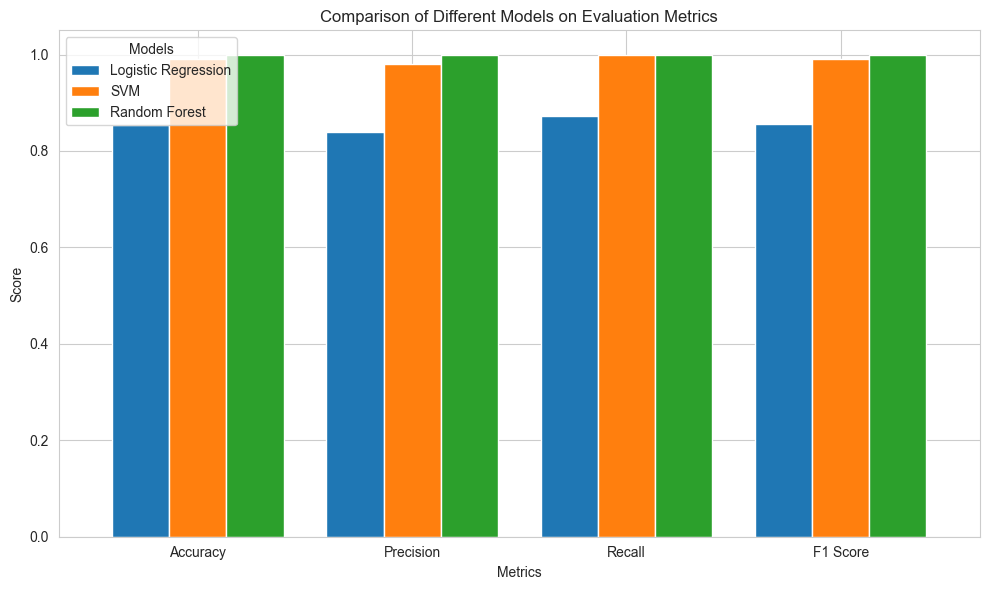

In [81]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_metrics = [logistic_acc, logistic_precision, logistic_recall, logistic_f1]
svm_metrics = [svc_acc, svc_precision, svc_recall, svc_f1]
rf_metrics = [rand_forest_acc, rand_forest_precision, rand_forest_recall, rand_forest_f1]
metrics_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'SVM': svm_metrics,
    'Random Forest': rf_metrics
}, index=metrics)


plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Comparison of Different Models on Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Models', loc='upper left')
plt.tight_layout()
plt.show()